https://explained.ai/decision-tree-viz/index.html
https://github.com/parrt/dtreeviz


In [5]:
import logging

# Create a logger
logger = logging.getLogger('nb')
logger.setLevel(logging.DEBUG)

# Create a file handler
file_handler = logging.FileHandler('notebook.log',mode='w')

# Set the log level for the file handler
file_handler.setLevel(logging.DEBUG)

# Create a formatter
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')

# Add the formatter to the file handler
file_handler.setFormatter(formatter)

# Add the file handler to the logger
logger.addHandler(file_handler)

# Test the logger
logger.debug('This is a debug message')
logger.info('This is an info message')
logger.warning('This is a warning message')
logger.error('This is an error message')


In [6]:
import dtreeviz
import pandas as pd
from sklearn import set_config
set_config(transform_output='pandas')

In [7]:
url = "https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv"
df = pd.read_csv('data/heart/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:


df = (
    df.rename(
        columns={
            "cp": "chest_pain",
            'sex':'is_male',
            "trtbps": "Resting_blood_pressure",
            "fbs": "(fasting blood sugar > 120)",
            "restecg": "resting electrocardiographic results",
            "thalachh": "maximum_heart_rate",
            "oldpeak": "Previous_peak",
            'chol' :'cholestoral',
            "slp": "slope",
            "caa": "number_of_major_vessels ",
            "thall": "thalium_stress",
            "exng": "exercise_induced_angina",
        }
    ).replace(
        {
            "chest_pain": {
                0: "Typical Angina",
                1: "Atypical Angina",
                2: "Non-anginal Pain",
                3: "Asymptomatic",
            },
            "Resting electrocardiographic results": {
                0: "Normal",
                1: "ST-T wave normality",
                2: "Left ventricular hypertrophy",
            },
            'thalium_stress':{2 : 'normal', 1 : 'fixed defect', 3 : 'reversable defect',0:'0'}
        }
    )
)
df.head()

,age,is_male,chest_pain,Resting_blood_pressure,cholestoral,(fasting blood sugar > 120),resting electrocardiographic results,maximum_heart_rate,exercise_induced_angina,Previous_peak,slope,number_of_major_vessels,thalium_stress,output
0,63,1,Asymptomatic,145,233,1,0,150,0,2.3,0,0,fixed defect,1
1,37,1,Non-anginal Pain,130,250,0,1,187,0,3.5,0,0,normal,1
2,41,0,Atypical Angina,130,204,0,0,172,0,1.4,2,0,normal,1
3,56,1,Atypical Angina,120,236,0,1,178,0,0.8,2,0,normal,1
4,57,0,Typical Angina,120,354,0,1,163,1,0.6,2,0,normal,1


In [9]:
df.thalium_stress.value_counts()

thalium_stress
normal               166
reversable defect    117
fixed defect          18
0                      2
Name: count, dtype: int64

In [10]:
# df.dtypes
logger.info(df.dtypes)

In [11]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.preprocessing import OneHotEncoder

In [12]:
X= df.drop('output',axis = 'columns')
y = df['output']
X_train,X_test,y_train,y_test= train_test_split(X,y)

In [13]:
X_train.select_dtypes('object')

,chest_pain,thalium_stress
71,Non-anginal Pain,reversable defect
60,Non-anginal Pain,normal
34,Asymptomatic,normal
231,Typical Angina,reversable defect
181,Typical Angina,reversable defect
...,...,...
219,Typical Angina,reversable defect
108,Atypical Angina,normal
116,Non-anginal Pain,normal
65,Typical Angina,normal


In [14]:
pipeline = make_pipeline(
    make_column_transformer(
        (
            OneHotEncoder(sparse_output=False),
            make_column_selector(dtype_include="object"),
        ),
        remainder="passthrough",
        verbose_feature_names_out=False,
    ),
    DecisionTreeClassifier(max_depth=3, min_samples_leaf=10),
)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x121628810>)],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=10))])

In [15]:
# list(X_train.columns)
X_train_transformed = pipeline.named_steps.columntransformer.transform(X_train)


In [16]:
vis_model = dtreeviz.model(
    model=pipeline[-1],
    X_train=X_train_transformed,
    y_train=y_train,
    feature_names=X_train_transformed.columns, class_names=['no heart attack','heart attack']
    
)

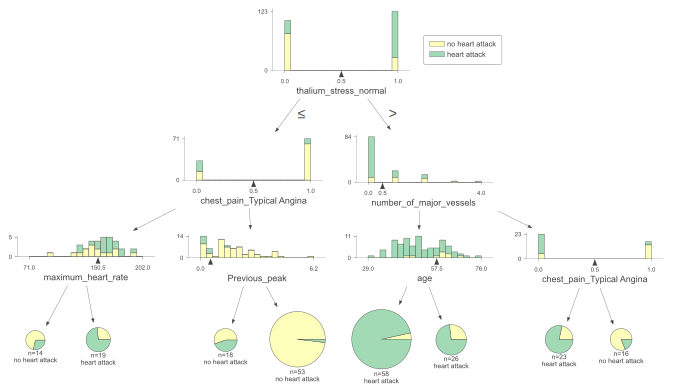

In [19]:
vis_model.view()

/Users/ezracitron/my_projects/learning/.venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


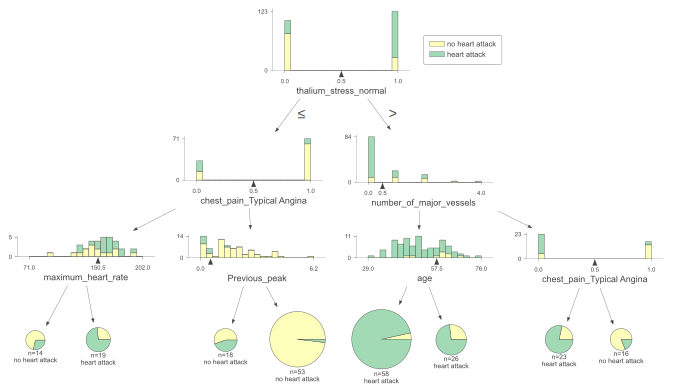

In [ ]:
vis_model.view(fancy=True)

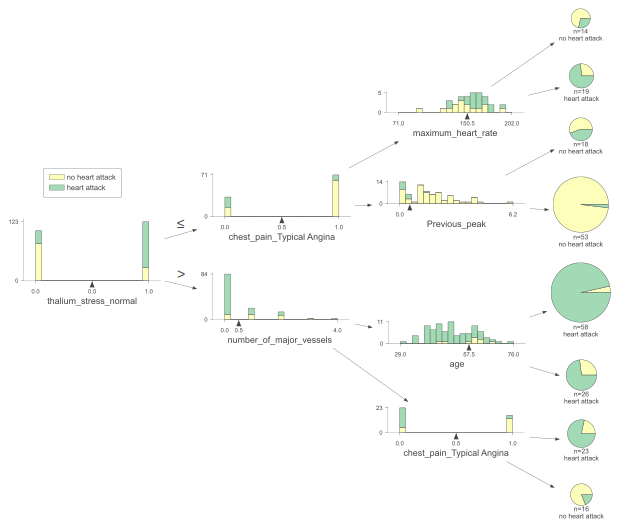

In [20]:
vis_model.view(orientation='LR')

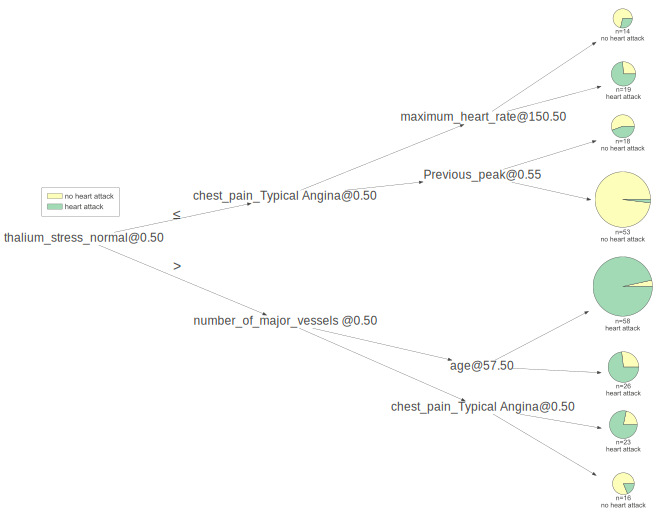

In [21]:
vis_model.view(orientation='LR',fancy=False)

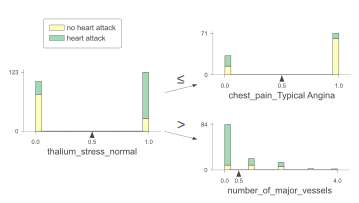

In [26]:
vis_model.view(orientation='LR',depth_range_to_display=(0,1))

/Users/ezracitron/my_projects/learning/.venv/lib/python3.11/site-packages/dtreeviz/models/shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/Users/ezracitron/my_projects/learning/.venv/lib/python3.11/site-packages/dtreeviz/trees.py:1231: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/Users/ezracitron/my_projects/learning/.venv/lib/python3.11/site-packages/dtreeviz/trees.py:420: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.i

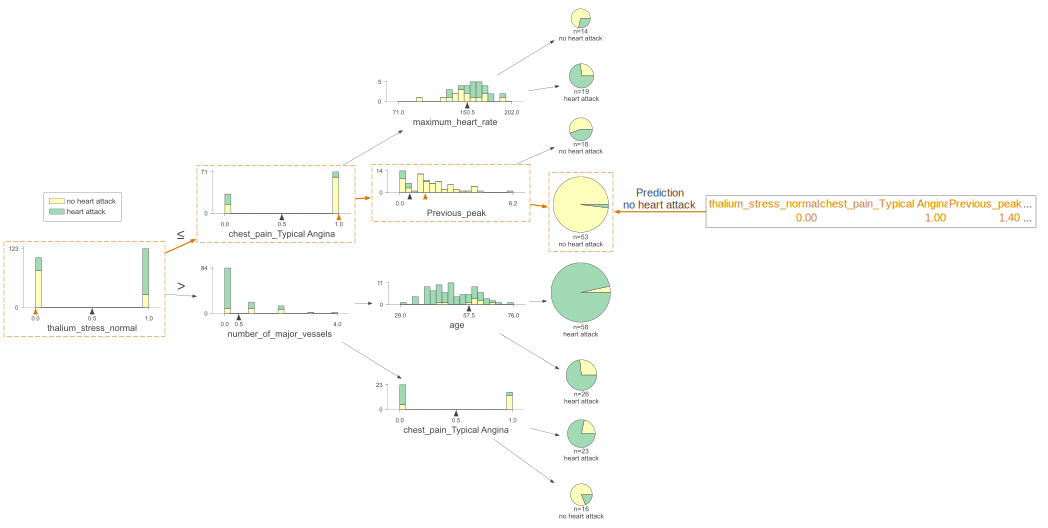

In [39]:
vis_model.view(x=X_train_transformed.iloc[5],orientation='LR')

In [44]:
x= X_train_transformed.iloc[5]

/Users/ezracitron/my_projects/learning/.venv/lib/python3.11/site-packages/dtreeviz/models/shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


/Users/ezracitron/my_projects/learning/.venv/lib/python3.11/site-packages/dtreeviz/trees.py:1231: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/Users/ezracitron/my_projects/learning/.venv/lib/python3.11/site-packages/dtreeviz/trees.py:420: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


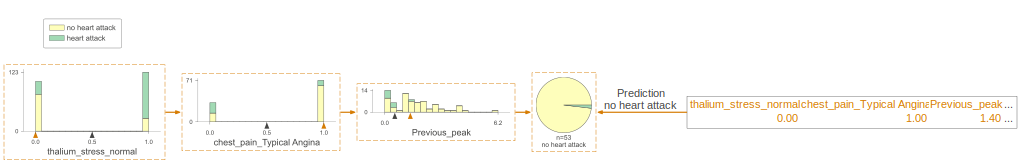

In [45]:

vis_model.view(x=x,orientation='LR',show_just_path=True)

In [46]:
print(vis_model.explain_prediction_path(x))

0.5 <= chest_pain_Typical Angina 
thalium_stress_normal < 0.5
0.55 <= Previous_peak 



/Users/ezracitron/my_projects/learning/.venv/lib/python3.11/site-packages/dtreeviz/models/shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/Users/ezracitron/my_projects/learning/.venv/lib/python3.11/site-packages/dtreeviz/interpretation.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


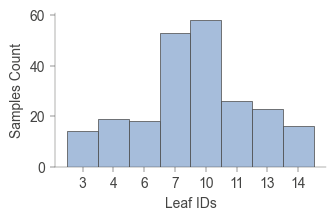

In [50]:
vis_model.leaf_sizes(figsize=(3.5, 2))

In [54]:
vis_model.node_stats(node_id=0)

,chest_pain_Asymptomatic,chest_pain_Atypical Angina,chest_pain_Non-anginal Pain,chest_pain_Typical Angina,thalium_stress_0,thalium_stress_fixed defect,thalium_stress_normal,thalium_stress_reversable defect,age,is_male,Resting_blood_pressure,cholestoral,(fasting blood sugar > 120),resting electrocardiographic results,maximum_heart_rate,exercise_induced_angina,Previous_peak,slope,number_of_major_vessels
count,227.0,227.0,227.0,227.0,227.0,227.0,227.0,227.0,227.0,227.0,227.0,227.0,227.0,227.0,227.0,227.0,227.0,227.0,227.0
mean,0.070485,0.167401,0.273128,0.488987,0.004405,0.070485,0.54185,0.38326,54.039648,0.696035,130.907489,242.185022,0.145374,0.546256,149.193833,0.339207,1.02467,1.418502,0.757709
std,0.256528,0.374158,0.446551,0.500983,0.066372,0.256528,0.499347,0.487255,8.878393,0.460984,17.377009,48.374472,0.353257,0.524886,23.035704,0.474486,1.101893,0.614148,1.016836
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.5,0.0,120.0,207.5,0.0,0.0,132.5,0.0,0.0,1.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,55.0,1.0,130.0,239.0,0.0,1.0,153.0,0.0,0.8,1.0,0.0
75%,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,60.5,1.0,140.0,269.0,0.0,1.0,165.0,1.0,1.6,2.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,76.0,1.0,200.0,417.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0


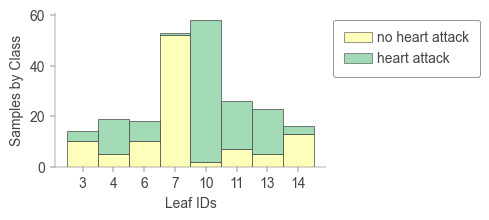

In [ ]:
vis_model.ctree_leaf_distributions(figsize=(3.5, 2))

/Users/ezracitron/my_projects/learning/.venv/lib/python3.11/site-packages/dtreeviz/models/shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


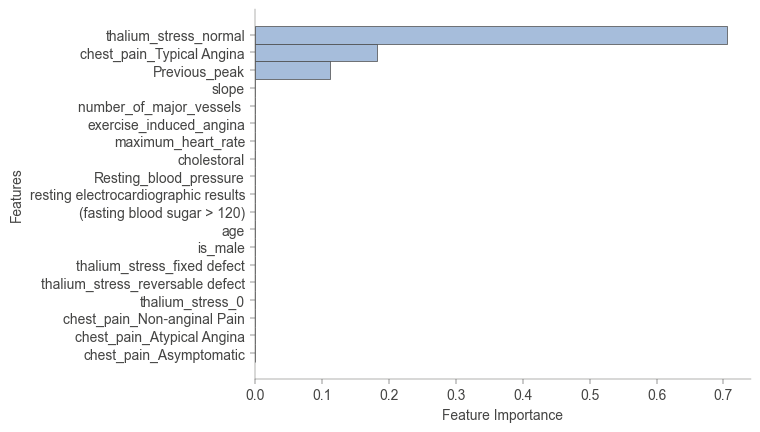

In [62]:
vis_model.instance_feature_importance(X_train_transformed.iloc[120])